<a href="https://colab.research.google.com/github/huskeypm/cellmigration/blob/main/migration_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook for processing particle simulator results
(launched from github)

* Upload csv files from working directory to DL:
e.g.
> cp $FAUST:/home/pkekeneshuskey/source/cellmigration/run/231129/test.png.csv ~/DL/

or

> cp /home/pkekeneshuskey/source/cellmigration/run/231129/test.png.csv ~/DL/

* mount google drive to write data (just hit google drive button under Files)


* Hop to [section](#myCell) to process


In [ ]:
colab=False

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# mount drive 1st (just for storing output images)
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    outPath='/content/drive/MyDrive/temp/231212/'
else:
    outPath = "/Users/huskeypm/sources/codes/cellmigration/"

In [7]:
import os

if os.path.exists(outPath) is False:
  raise RuntimeError("Be sure to mount google drive")

In [23]:
!git clone https://github.com/huskeypm/cellmigration
#!cd /content/cellmigration; git pull


remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 6), reused 9 (delta 6), pack-reused 0
Unpacking objects: 100% (9/9), 985 bytes | 246.00 KiB/s, done.
From https://github.com/huskeypm/cellmigration
   ab2c651..d0b9adf  main       -> origin/main
Updating ab2c651..d0b9adf
Fast-forward
 paper/template_full.yaml | 2 +-
 processData.py           | 2 +-
 2 files changed, 2 insertions(+), 2 deletions(-)


In [9]:
import sys
sys.path.append('/content/cellmigration')

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import processData as pdat
cases = dict()
class empty:pass

/content/cellmigration/processData.py:15: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if key is not 'all':


Partition file according to cases

,Unnamed: 0,trajName,tag,condVal,D,flux*A(reservoir),flux*A(crowd),Vol Frac,Area Frac
0,0,crowder_atp_crowderAttr0.050000_00,crowderAttr,0.05,-0.000199,-7.036006e-07,-1.056677e-09,0.434513,0.619325
1,0,crowder_atp_crowderAttr0.050000_01,crowderAttr,0.05,0.000053,-6.929111e-07,-1.190069e-09,0.434513,0.622488
2,0,crowder_atp_crowderAttr0.050000_02,crowderAttr,0.05,0.000146,-6.879608e-07,-1.074721e-09,0.434513,0.624003
3,0,crowder_atp_crowderAttr0.050000_03,crowderAttr,0.05,-0.000032,-6.441627e-07,-9.522912e-10,0.434513,0.619359
4,0,crowder_atp_crowderAttr0.050000_04,crowderAttr,0.05,0.000027,-6.468736e-07,-1.113374e-09,0.434513,0.622756
...,...,...,...,...,...,...,...,...,...
451,0,nocrowder_nocontainment_xScale0.000000_00,xScale,0.00,0.925943,-3.137859e-07,2.741238e-08,0.999997,0.362106
452,0,nocrowder_nocontainment_xScale0.000000_01,xScale,0.00,0.806456,-3.978245e-07,4.303394e-08,0.999997,0.407166
453,0,nocrowder_nocontainment_xScale0.000000_02,xScale,0.00,1.163383,-2.771831e-07,3.924223e-08,0.999997,0.378041
454,0,nocrowder_nocontainment_xScale0.000000_03,xScale,0.00,0.902040,-4.624578e-07,3.308738e-08,0.999997,0.370025


In [28]:
dataFrameName = outPath+"all.csv"

df = pd.read_csv(dataFrameName)

# get number of cases
ex = 'nocrowder_nocontainment_xScale0.000000_'#assuming ends w 00,01,..0X
nCases = len(df.query('trajName.str.startswith("%s")'%ex))
print("We found %d runs per case"%nCases)

We found 5 runs per case


In [29]:
### pull out those without ATP in the title
#new_df = df[~df["col"].str.contains(word)]

nocrowder_unconstr = df.loc[
     df['trajName'].str.contains("nocrowder_nocontainment")  &
    ~df['trajName'].str.contains("atp")
]


nocrowder_noatp = df.loc[
     df['trajName'].str.contains("nocrowder")  &
    ~df['trajName'].str.contains("atp")
]

nocrowder_atp = df.loc[
     df['trajName'].str.contains("nocrowder")  &
     df['trajName'].str.contains("atp")
]

crowder_noatp = df.loc[
     df['trajName'].str.contains("^crowder")  &
    ~df['trajName'].str.contains("atp")
]
#print(crowder_noatp.tail())

crowder_atp = df.loc[
     df['trajName'].str.contains("^crowder")  &
     df['trajName'].str.contains("atp")
]


In [30]:
df.loc[
     df['trajName'].str.contains("crowderAttr") ]

,Unnamed: 0,trajName,tag,condVal,D,flux*A(reservoir),flux*A(crowd),Vol Frac,Area Frac
0,0,crowder_atp_crowderAttr0.050000_00,crowderAttr,0.05,-0.000199,-7.036006e-07,-1.056677e-09,0.434513,0.619325
1,0,crowder_atp_crowderAttr0.050000_01,crowderAttr,0.05,0.000053,-6.929111e-07,-1.190069e-09,0.434513,0.622488
2,0,crowder_atp_crowderAttr0.050000_02,crowderAttr,0.05,0.000146,-6.879608e-07,-1.074721e-09,0.434513,0.624003
3,0,crowder_atp_crowderAttr0.050000_03,crowderAttr,0.05,-0.000032,-6.441627e-07,-9.522912e-10,0.434513,0.619359
4,0,crowder_atp_crowderAttr0.050000_04,crowderAttr,0.05,0.000027,-6.468736e-07,-1.113374e-09,0.434513,0.622756
...,...,...,...,...,...,...,...,...,...
114,0,crowder_crowderAttr0.200000_03,crowderAttr,0.20,0.000074,-5.710474e-07,-1.231778e-09,0.434513,0.587806
115,0,crowder_crowderAttr0.200000_04,crowderAttr,0.20,0.000148,-5.232525e-07,-1.286706e-09,0.434513,0.584584
116,0,crowder_crowderAttr2.000000_00,crowderAttr,2.00,-0.000002,-5.602062e-07,-1.206223e-09,0.434513,0.536959
117,0,crowder_crowderAttr4.000000_00,crowderAttr,4.00,0.000186,-5.778484e-07,-1.089259e-09,0.434513,0.517088


### Case: no crowders

In [16]:
dataFrameName = "fig4.csv"
dataFrameName = "nocrowder.csv"

if False:
  df = pd.read_csv(dataFrameName)
else:
  df = nocrowder_noatp


Determine normalization for all cases

In [17]:
key = "nCells"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.JAstds, case.vFs = pdat.ProcessGroup(df,key)

# get JA at largest vol frac
idx = np.argmax(case.vFs)
jNormFactor = 1/case.JAs[ idx ]
def hs(vf):
  return 2*vf/(3-vf)
jNormFactor*=hs( case.vFs[idx] )

case.JAs[ idx ]
print(jNormFactor)

nCells [30. 40. 50. 60. 70. 80. 90.]
-1364282.4406630632


nCells [30. 40. 50. 60. 70. 80. 90.]


(0.0, 1.05)

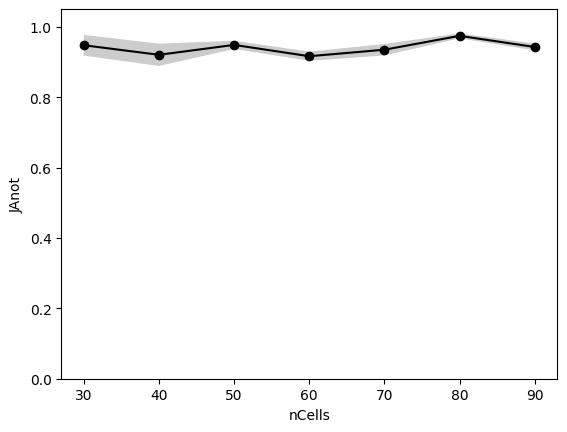

In [18]:

# get all entries with a given key name
key = "nCells"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.JAstds,  case.vFs = pdat.ProcessGroup(df,key)
cases[key] = case

stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,mode="JA")
plt.ylim([0,1.05])


In [19]:
provide mean position for uncontains cases

SyntaxError: ignored

### Introduce ATP into the equation

 <a class="anchor" name="myCell"></a>



In [20]:
import pandas as pd
if False:
  dataFrameName = "nocrowder.csv"
  df = pd.read_csv(dataFrameName)
  dataFrameName = "nocrowder_atp.csv"
  dfATP = pd.read_csv(dataFrameName)
else:
  df = nocrowder_noatp
  dfATP=nocrowder_atp


In [21]:
dfATP

,Unnamed: 0,trajName,tag,condVal,D,flux*A(reservoir),flux*A(crowd),Vol Frac,Area Frac
168,0,nocrowder_atp_cellAttr0.050000_00,cellAttr,0.05,0.000007,-7.605973e-07,-6.016937e-10,0.999997,0.946881
169,0,nocrowder_atp_cellAttr0.050000_01,cellAttr,0.05,0.000039,-7.728295e-07,-5.487167e-10,0.999997,0.945034
170,0,nocrowder_atp_cellAttr0.050000_02,cellAttr,0.05,-0.000097,-8.494892e-07,-5.156508e-10,0.999997,0.936034
171,0,nocrowder_atp_cellAttr0.050000_03,cellAttr,0.05,0.000030,-7.496969e-07,-5.286281e-10,0.999997,0.939259
172,0,nocrowder_atp_cellAttr0.050000_04,cellAttr,0.05,-0.000062,-7.430520e-07,-5.717936e-10,0.999997,0.952409
...,...,...,...,...,...,...,...,...,...
344,0,nocrowder_atp_yScale7.000000_00,yScale,7.00,0.000039,-7.733884e-07,-5.593184e-10,0.999997,0.943428
345,0,nocrowder_atp_yScale7.000000_01,yScale,7.00,0.000058,-8.463665e-07,-4.688464e-10,0.999997,0.945156
346,0,nocrowder_atp_yScale7.000000_02,yScale,7.00,0.000015,-7.766710e-07,-5.782919e-10,0.999997,0.944619
347,0,nocrowder_atp_yScale7.000000_03,yScale,7.00,0.000161,-7.660951e-07,-5.059465e-10,0.999997,0.950922


In [24]:
#if 1: # for right now
case = empty()
case.conds,case.Ds,case.Dstds, case.JAs,case.JAstds,case.volFracs = pdat.ProcessGroup(nocrowder_unconstr,'all')
cases["unconstr"] = case

case = empty()
case.conds,case.Ds,case.Dstds, case.JAs,case.JAstds,case.volFracs = pdat.ProcessGroup(dfATP,"xScale")
cases["constr"] = case

#dfATP.xScale
fig,axl = plt.subplots()
case = cases["unconstr"]

#axl.plot(case.conds,case.Ds,label='D')
#axr.err(case.conds,case.Dstds/np.sqrt(nCases))
axl.errorbar(case.conds,case.Ds,
            yerr=case.Dstds / np.sqrt(nCases),
            fmt='-o',color='blue')
axl.set_ylabel("D")
axl.set_xlabel("[ATP]")
axl.legend(loc=0)
axl.set_ylim([0,1.25])

# we use negative -1 since negative flux is going across toward right
axr = axl.twinx()
case = cases["constr"]
stds = case.JAstds*-1*jNormFactor
#axr.plot(case.conds,case.JAs*jNormFactor,'gray')
axr.errorbar(case.conds,case.JAs*jNormFactor,
             yerr=stds/ np.sqrt(nCases),
             fmt='-o',color='gray')
axr.set_ylabel("JA*A")
axr.set_ylim([0,1.25])

plt.gcf().savefig(outPath+"fig4_D_vs_ATP.png",dpi=300)

/content/cellmigration/processData.py:15: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if key is not 'all':


TypeError: ignored

nCells [30. 40. 50. 60. 70. 80. 90.]
nCells [30. 40. 50. 60. 70. 80. 90.]
Assuming middle value is reference
x(3) = 60.000000
Assuming middle value is reference
x(3) = 60.000000


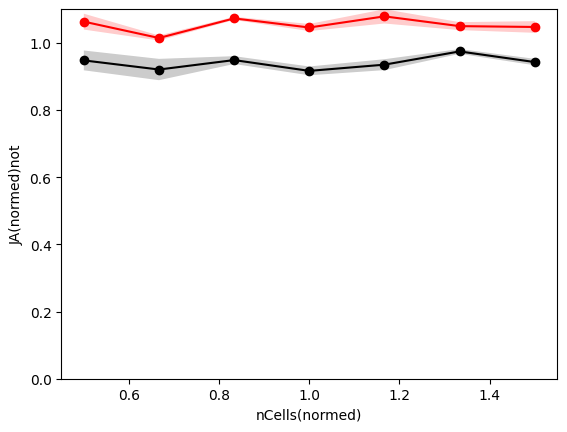

In [25]:
# plotting two sets of data
# get all entries with a given key name
key = "nCells"

case = empty()
case.conds,case.Ds,case.Dstds, case.JAs,case.JAstds, case.vFs = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case

print("WARNING: using incorrect stderr")
case = cases[key+"-atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,normalize=True,mode="JA")

case = cases[key+"+atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='r',normalize=True,mode="JA")
plt.ylim([0,1.1])
plt.gcf().savefig(outPath+"fig4_nCells.png",dpi=300)


cellRad [2.         2.5198421  3.1748021  4.         5.0396842  6.34960421
 8.        ]
cellRad [2.         2.5198421  3.1748021  4.         5.0396842  6.34960421
 8.        ]
Assuming middle value is reference
x(3) = 4.000000
Assuming middle value is reference
x(3) = 4.000000


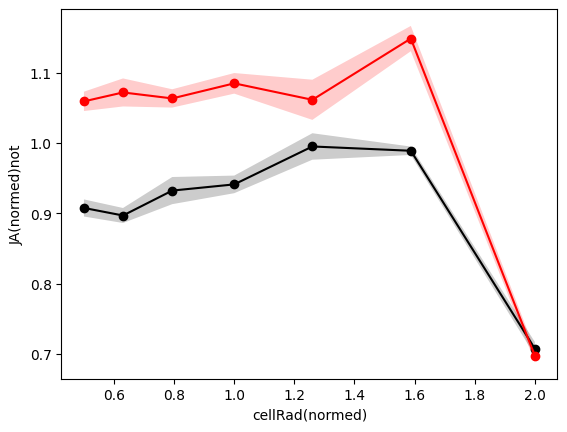

In [26]:

key = "cellRad"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='k',normalize=True,mode="JA")


case = cases[key+"+atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='r',normalize=True,mode="JA")


plt.gcf().savefig(outPath+"fig4_cellRad.png",dpi=300)

cellAttr [0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]
cellAttr [0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]
Assuming middle value is reference
x(3) = 0.100000
Assuming middle value is reference
x(3) = 0.100000


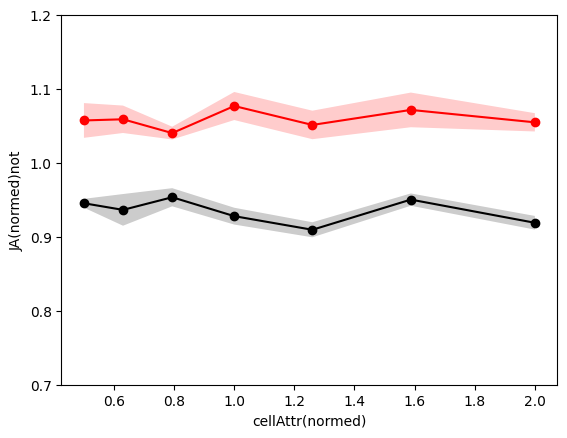

In [27]:
key = "cellAttr"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='k',normalize=True,mode="JA")

case = cases[key+"+atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='r',normalize=True,mode="JA")
plt.ylim([0.7,1.2])

plt.gcf().savefig(outPath+"fig4_cellAttr.png",dpi=300)

yScale [0. 1. 2. 3. 4. 5. 6. 7.]


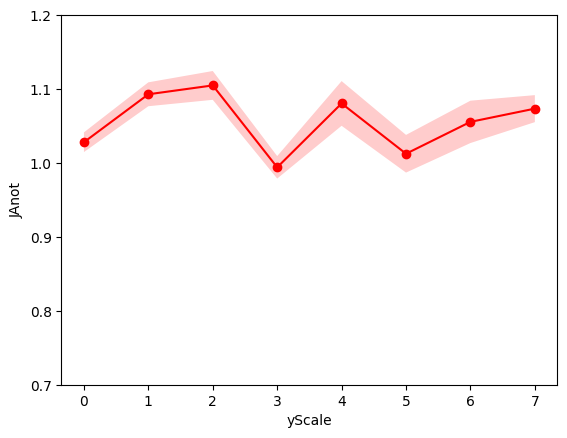

In [31]:
key = "yScale"

#case = empty()
#case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(df,key)
#cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


#case = cases[key+"-atp"]
#stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
#pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='k',normalize=True,mode="JA")


case = cases[key+"+atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='r',#normalize=True,
             mode="JA")
plt.ylim([0.7,1.2])


plt.gcf().savefig(outPath+"fig4_yScale.png",dpi=300)

## CROWDERS WITH ATP

In [32]:
if False:
  dataFrameName = "crowder.csv"
  df = pd.read_csv(dataFrameName)
  dataFrameName = "crowder_atp.csv"
  dfATP = pd.read_csv(dataFrameName)
else:
  df = crowder_noatp
  dfATP = crowder_atp



nCrowders [ 1.  4. 18.]
nCrowders [ 1.  4. 18.]
Assuming middle value is reference
x(1) = 4.000000
Assuming middle value is reference
x(1) = 4.000000


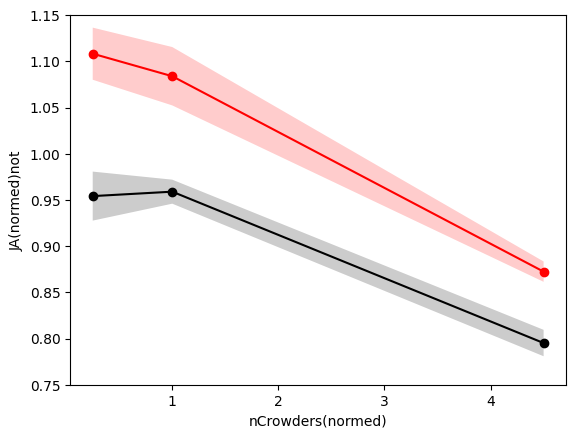

In [33]:
key = "nCrowders"

case = empty()
case.conds,case.Ds,case.Dstds, case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds, case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case



case = cases[key+"-atp"]
#PlotKey(case.conds,case.Ds,case.Dstds,key,normalize=False)
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='k',normalize=True,mode="JA")

case = cases[key+"+atp"]
#PlotKey(case.conds,case.Ds,case.Dstds,key,color='r',normalize=False)
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='r',normalize=True,mode="JA")
plt.ylim([0.75,1.15])

plt.gcf().savefig(outPath+"fig5_nCrowders.png",dpi=300)


crowderRad [ 0.1  1.   3.   5.   7.   9.  10. ]
JAs [-6.87921953e-07 -6.49651814e-07 -6.58211763e-07 -6.46795168e-07
 -6.29291906e-07 -6.00082000e-07 -5.87193874e-07] [0.93851984 0.88630856 0.89798675 0.88241129 0.8585319  0.81868133
 0.80109829]
NEED TO ADJUST FOR ACTUAL CALCULTION 
crowderRad [ 0.1  1.   3.   5.   7.   9.  10. ]
+ATP JAs [1.05805156 1.03879504 1.02125003 1.0019414  0.95827284 0.92116515
 0.88982877]


array([0.93111187, 0.91784375, 0.8840925 , 0.82520687, 0.74439812,
       0.6551025 , 0.60863359])

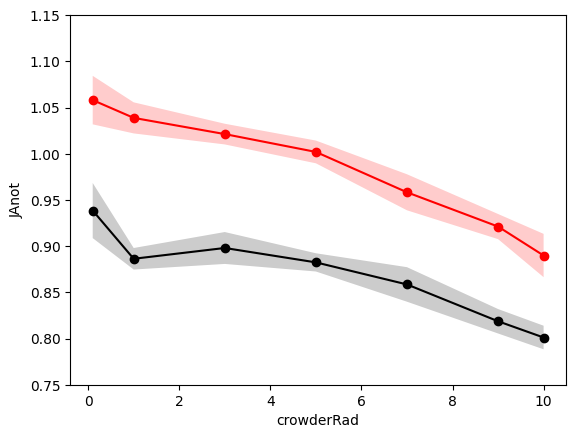

In [34]:
key = "crowderRad"

vfs = np.linspace(0.6,1.,20)
hs = 2*vfs/(3-vfs)


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case

#print('JAs',case.JAs)
print('JAs',case.JAs, case.JAs*jNormFactor)
print("NEED TO ADJUST FOR ACTUAL CALCULTION ")

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case
print('+ATP JAs',case.JAs*jNormFactor)

case = cases[key+"-atp"]
#pdat.PlotKey(case.conds,case.Ds,stds,key,normalize=False)
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,normalize=False,mode="JA")

case = cases[key+"+atp"]
#pdat.PlotKey(case.conds,case.Ds,case.Dstds,key,color='r',normalize=False)
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='r',normalize=False,mode="JA")
plt.ylim([0.75,1.15])

plt.gcf().savefig(outPath+"fig5_crowderRad.png",dpi=300)

case.vFs


crowderAttr [0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2        2.         4.         6.        ]
crowderAttr [0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]


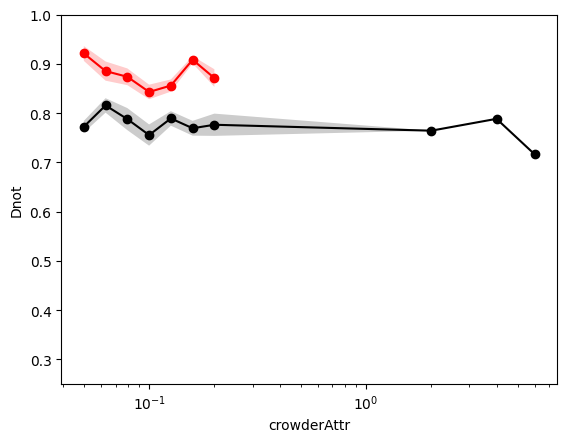

In [38]:
key = "crowderAttr"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs,case.JAstds, case.vFs  = pdat.ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key)#,normalize=True)

case = cases[key+"+atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.conds,case.JAs*jNormFactor,stds,key,color='r')#,normalize=True)
plt.xscale('log')
plt.ylim([0.25,1.0])

plt.gcf().savefig(outPath+"fig5_crowderAttr.png",dpi=300)

## Continuum data

- Run master on kant (test07-test10)
(https://bitbucket.org/huskeypm/diffusion_example_2d/src/master/requests/??????)

- See paper notes for more detail on repository

<code>
../solutions/test07/smol/0001/info.yaml:Deff_membrane: 0.49443361495120397
../solutions/test08/smol/0001/info.yaml:Deff_membrane: 0.7730293910002057
../solutions/test09/smol/0001/info.yaml:Deff_membrane: 0.7963113880422519
../solutions/test10/smol/0001/info.yaml:Deff_membrane: 0.9866307129197737
Singularity> grep phi_memb ../solutions/test*/smol/0001/info.yaml
../solutions/test07/smol/0001/info.yaml:phi_membrane: 0.6681145173651292
../solutions/test08/smol/0001/info.yaml:phi_membrane: 0.8539840575456275
../solutions/test09/smol/0001/info.yaml:phi_membrane: 0.8772177500681925
../solutions/test10/smol/0001/info.yaml:phi_membrane: 0.9933862126810031
</code>

In [ ]:
import matplotlib.pylab as plt
import numpy as np
phis = np.array([0.4108862126810036, 0.6681145173651292, 0.8539840575456275, 0.8772177500681925, 0.9933862126810031])
Ds = np.array([0.403642231410656, 0.49443361495120397, 0.7730293910002057, 0.7963113880422519, 0.9866307129197737])

In [ ]:
case.vFs

array([0.62158625, 0.61652266, 0.60976562, 0.60415313, 0.60019062,
       0.59618688, 0.59063875])

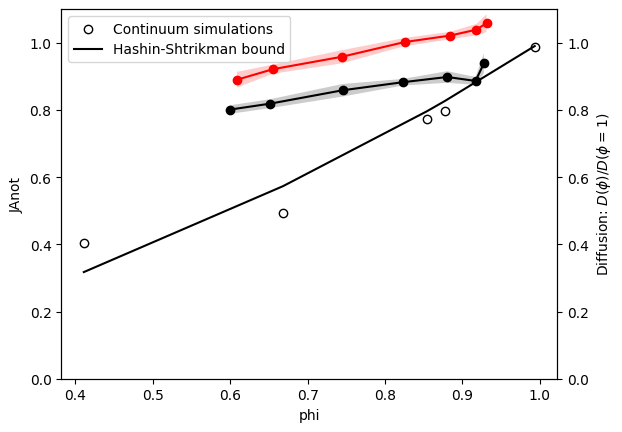

In [ ]:
daMax=1.10

key="crowderRad"
# particle
plt.figure()
case = cases[key+"-atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.vFs,case.JAs*jNormFactor,stds,key,normalize=False, mode="JA",altName="phi")

case = cases[key+"+atp"]
stds = case.JAstds*-1*jNormFactor / np.sqrt(nCases)
pdat.PlotKey(case.vFs,case.JAs*jNormFactor,stds,key,color='r',normalize=False,mode="JA",altName="phi")
plt.ylim([0,daMax])

# continuum
#fig,axl = plt.subplots(1)
axr = plt.twinx()
axr.scatter(phis,Ds,edgecolor='k', facecolor='w',label="Continuum simulations")

# analytic
axr.plot(phis,2*phis/(3-phis),'k',label="Hashin-Shtrikman bound")
axr.legend(loc=0)
axr.set_xlabel("Free volume(area) fraction, $\phi$")
axr.set_ylabel("Diffusion: $D(\phi)/D(\phi=1)$")
axr.set_ylim([0,daMax])

plt.gcf().savefig(outPath+"fig7_DvsPhi.png",dpi=300)


Widths

Created test11-13
<code>
$ grep totflux_A_pore ../solutions/test11/smol/0001//info.yaml
totflux_A_pore: 0.05925859045541587
$ grep totflux_A_pore ../solutions/test12/smol/0001/info.yaml
totflux_A_pore: 0.07531812128985557
$ grep totflux_A_pore ../solutions/test13/smol/0001/info.yaml
totflux_A_pore: 0.0876739876632738
</code>

5, 7, and 9 pore widths; assuming it's 11 high

///// reservoir on right (negative, positive); negative in channel
 0.11386163913859533 #(both particle and potential are negative?, so why is flux increased?)
 0.06720684392605135  
 0.07531812128985557
0.08490851205509801

conc higher on left in model


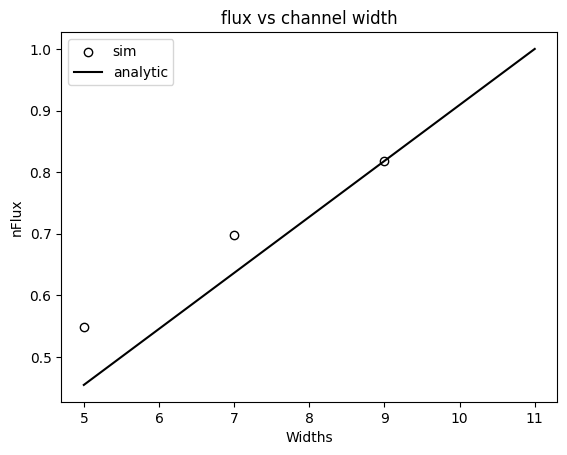

In [ ]:
widths=[5,7,9]
fluxes = np.array([0.059,0.075,0.088])
max=11 # include this in widths next time
print("WARNING: use actual value")
maxFlux = fluxes[2]*max/widths[2]

import matplotlib.pylab as plt
import numpy as np
plt.scatter(widths,fluxes/maxFlux, edgecolor='k', facecolor='w',label="sim")
validwidths = np.array([5,7,9,max])
plt.plot(validwidths,validwidths/max,'k',label='analytic')
plt.ylabel("nFlux")
plt.xlabel("Widths")
plt.title("flux vs channel width")
plt.legend(loc=0)


plt.gcf().savefig(outPath+"fig7_JvsW.png",dpi=300)


In [ ]:
maxFlux

1.0755555555555556

In [ ]:
ATTEMPTING TO GET POTENTIALS IMPOSED